# Homework 3: Optimization, KNN and Decision Trees
by Rachel Manzelli and Brian Kulis

## Setup

To run and solve this assignment, you must have access to a working Jupyter Notebook installation. We recommend Google Colab. If you are already familiar with Jupyter and have your own installation, you may use it; however, you will have to tweak Colab-specific commands we've entered here (for example, file uploads).

To use Google Colab:

1. Download this `ipynb` file.
2. Navigate to https://colab.research.google.com/ and select `Upload` in the pop-up window.
3. Upload this file. It will then open in Colab.

The below statements assume that you have already followed these instructions. If you need help with Python syntax, NumPy, or Matplotlib, you might find Week 1 discussion material useful.

To run code in a cell or to render Markdown+LaTeX press Ctrl+Enter or "`Run`" button above. To edit any code or text cell, double-click on its content. Put your solution into boxes marked with **`[double click here to add a solution]`** and press Ctrl+Enter to render text. You can add cells via `+` sign at the top left corner.

**Submission instructions**: please upload your completed solution file as well as a scan of any handwritten answers to Gradescope by **February 24th at midnight**.

### 1. Maximum Likelihood without a Closed-Form Solution

Assume that we are given $n$ IID samples ${x_1,...x_n}$ from the following $P(X|\theta)$:

$$P(X|\theta) = \frac{1}{\pi}\bigg [\frac{1}{(x-\theta)^2+1}\bigg ]$$

#### 1.a. Try to compute the MLE via maximizing the log-likelihood function directly, and briefly explain why this won't work.

**`[double click here to add a solution]`**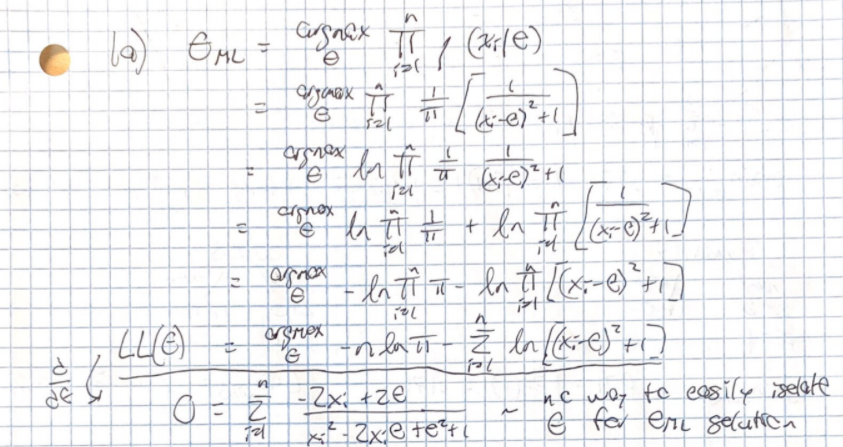

#### 1.b. Convert the objective (log-likelihood) function into a cost function, $J(\theta)$, that we can minimize using gradient descent.

**`[double click here to add a solution]`**
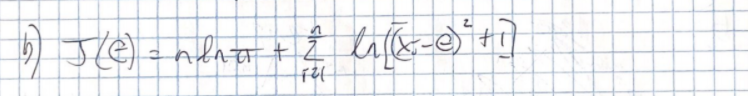

#### 1.c. Compute the gradient descent update rule, where $\theta_{n+1}=\theta_n - \alpha\frac{d}{d\theta_n}J(\theta_n)$.

**`[double click here to add a solution]`**
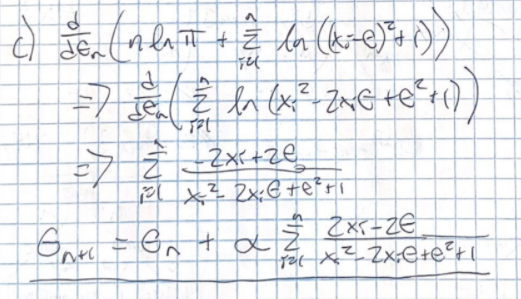

#### 1.d. Write the pseudocode for gradient descent with this update rule.

**`[double click here to add a solution]`**
1. Initialize the weights $\theta$ randomly
2. Calculate the cost gradient d/dtheta of the cost function $J(\theta)$
3. int gradientdescent(int thetan, int alpha, int sizen, int costgradient){
  - sum = 0
  - for (int i = 0;i<sizen, i++){
  -  sum += gradient[i] * alpha
  }
  - return thetan + sum
}

#### 1.e. (Bonus) Compute the stochastic gradient descent (SGD) update rule, and write pseudocode for SGD with this update rule. (Assume a mini-batch size of 1.)

**`[double click here to add a solution]`**
1. Compute gradient: thetan+1 = thetan + (1/1)alpha* 2xi-2theta/(xi^2-2xi*theta+theta^2+1)
 =>thetan+1 = thetan + (1/1)alpha*2x-2*theta/(x^2-2x*theta+theta^2+1)
 2. int gradientdescent(int thetan, int alpha, int x){
  - sum = 0
  -  sum = alpha*(2x-2theta)/(x^2-2x*theta+theta^2+1)
  - return thetan + sum
}

### 2. Decision Trees

The following dataset contains information about different weather attributes, along with whether the golf team decided to play. Each row represents the characteristics of one day.


| Temp        | Humidity    | Wind        | Play?       |
| ----------- | ----------- | ----------- | ----------- |
| hot         | normal      | strong      | no          |
| mild        | high        | strong      | yes         |
| hot         | normal      | strong      | no          |
| hot         | normal      | weak        | yes         |
| mild        | normal      | strong      | yes         |


We will construct a decision tree that predicts whether or not the current weather attributes are appropriate for playing golf.

#### 2.a. Choose a root node.
Follow the method of using information gain to choose a root node for our decision tree, as described in class (and posted in the slides on Blackboard).

**`[double click here to add a solution]`**
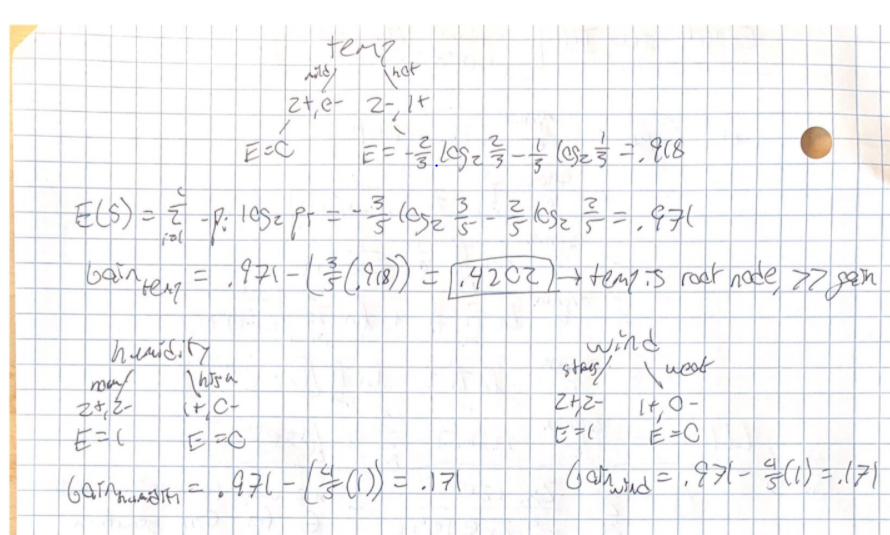

#### 2.b. Complete the tree.
Repeat the method of using information gain to split on another feature, as described in class (and posted in the slides on Blackboard).

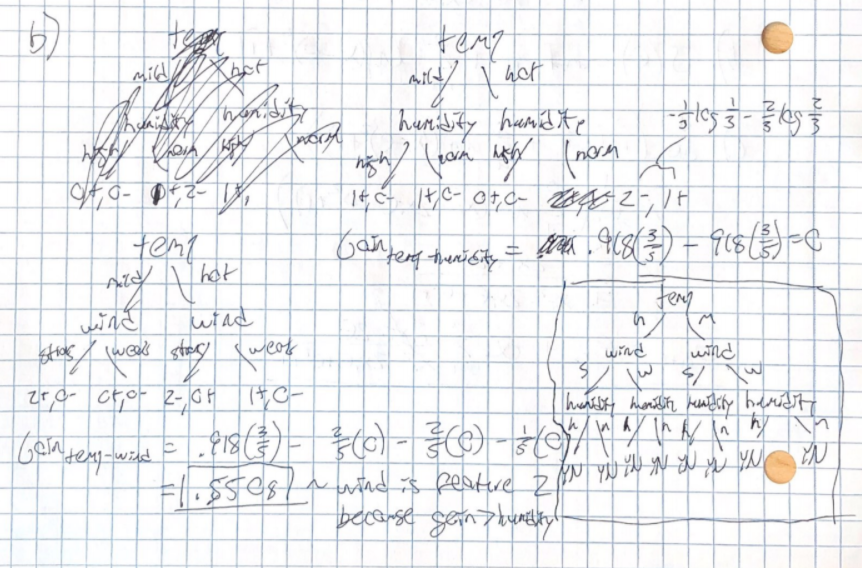

### 3. K-Nearest Neighbors on NIST

We're going to build a K-nearest neighbors classifier from scratch, including validating for the best K, and test it out on NIST, a handwritten digits dataset.

The 64 features of this dataset are the values of each pixel in the 8x8 image grid of one handwritten digit, where the digits are written in white (pixel value 255) and the surrounding space is black (pixel value 0). Each sample represents one image.

#### First, install the latest release of `sklearn`.

In [ ]:
# These datasets require the latest release of sklearn (0.24.1).
# We are going to uninstall the default Colab version (if you are using Colab) or your current version, and install version 0.24.1.
# AFTER RUNNING THIS CELL, YOU MAY NEED TO RESTART THE RUNTIME. GO TO Runtime/Kernel -> Restart Runtime to do this. 
# (Or, in Colab, hit the RESTART RUNTIME button at the bottom if there is an error message when you run this cell.)
# You only need to do this once, but if the Colab runtime disconnects, you will need to do it again!

!pip uninstall scikit-learn -y
!pip install scikit-learn==0.24.1

Uninstalling scikit-learn-0.24.1:
  Successfully uninstalled scikit-learn-0.24.1
  Using cached https://files.pythonhosted.org/packages/f3/74/eb899f41d55f957e2591cde5528e75871f817d9fb46d4732423ecaca736d/scikit_learn-0.24.1-cp37-cp37m-manylinux2010_x86_64.whl


#### Verify we're using the correct version. (If it is not 0.24.1, restart the runtime, or try installing again.)

In [ ]:
import sklearn
print(sklearn.__version__)

0.24.1


#### Import the data and take a look at some samples.

In [ ]:
import pandas as pd
from sklearn.datasets import load_digits

# Import the data into a pandas dataframe
nist = load_digits()
nist_df = pd.DataFrame(nist.data, columns = nist.feature_names)

# Split data into features and labels
X = nist.data
y = nist.target

# View the raw data
nist_df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,pixel_1_2,pixel_1_3,pixel_1_4,pixel_1_5,pixel_1_6,pixel_1_7,pixel_2_0,pixel_2_1,pixel_2_2,pixel_2_3,pixel_2_4,pixel_2_5,pixel_2_6,pixel_2_7,pixel_3_0,pixel_3_1,pixel_3_2,pixel_3_3,pixel_3_4,pixel_3_5,pixel_3_6,pixel_3_7,pixel_4_0,pixel_4_1,pixel_4_2,pixel_4_3,pixel_4_4,pixel_4_5,pixel_4_6,pixel_4_7,pixel_5_0,pixel_5_1,pixel_5_2,pixel_5_3,pixel_5_4,pixel_5_5,pixel_5_6,pixel_5_7,pixel_6_0,pixel_6_1,pixel_6_2,pixel_6_3,pixel_6_4,pixel_6_5,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


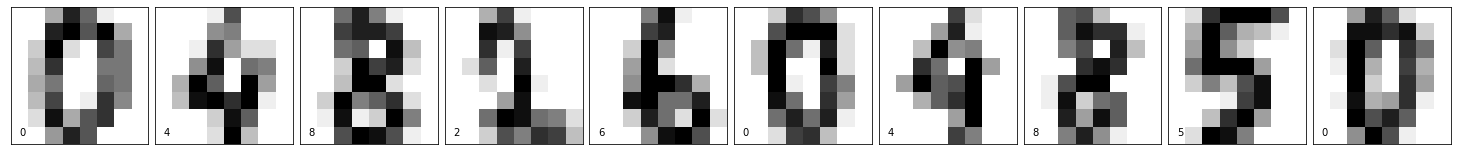

In [ ]:
# Visualize 10 random samples as 8x8 images
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(20, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(10):
    ax = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(nist.images[i*4], cmap=plt.cm.binary, interpolation='nearest')
    # Label the image with the target value
    ax.text(0, 7, str(nist.target[i*4]))

#### 3.a. Split the data into train, test, and validation sets.

Use a 60/20/20 split. Make sure to set `random_state=42` to shuffle the dataset in a consistent manner.

In [ ]:
from sklearn.model_selection import train_test_split

### ADD CODE HERE:

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)# -- Code Required --
xtrain, xval, ytrain, yval = train_test_split(xtrain, ytrain, test_size=0.25, random_state=42, shuffle=True) # -- Code Required --
# Split the data into training, test, and validation sets, just like we did on HW 2
# Make sure to set random_state=42!
###
print(xtrain.shape)

(1077, 64)


#### 3.b. Implement a Euclidean distance function.
We'll need to calculate the Euclidean distance between points of arbitrary dimensions, which you'll implement by filling in the function below. (*Hint: use [this](https://docs.scipy.org/doc/scipy/reference/spatial.distance.html).*)

In [ ]:
from scipy.spatial import distance

def euclidean_distance(a, b):
    '''
    A function that calculates and returns the Euclidean distance between vectors a and b.
    '''
    dist = distance.euclidean(a,b)
    
    ### ADD CODE HERE: calculate dist, the Euclidean distance between a and b

    return dist

#### 3.c. Implement the K-nearest neighbors algorithm.
The two functions below make up a skeleton of the KNN algorithm, which you will complete.

The first, `compute_neighbors_and_classify()`:
1. Computes the neighbors given `k` (the number of neighbors)
2. Finds the `k` neighbors with the smallest Euclidean distance to the test point (using `euclidean_distance()` above)
3. Returns the most common classification label among those `k` neighbors.

The second, `compute_accuracy_on_dataset()`:
1. Gets the KNN classification predictions for each test point using `compute_neighbors_and_classify()`.
2. Compares the predictions to the real values.
3. Returns the accuracy score (how many predictions the model got right divided by total number of samples).

In [ ]:
from scipy.stats import mode

def compute_neighbors_and_classify(X_train, y_train, test_point, k):
    '''
    A function that computes the k neighbors in X_train closest to one test point, 
    and returns the classification.
    '''
    # This is a list to hold all of the distances associated with the points and their labels
    distances = []
    # Loop over the training points
    for i, train_point in enumerate(X_train):
        
        ### ADD CODE HERE:
        # Compute the Euclidean distance `dist` from this training point to the test point
        ### 
        dist = euclidean_distance(train_point, test_point)

        # Add the distance, the point, and its label (as a tuple) value to our list
        # We use a tuple so we can sort the list later while keeping each neighbor next to its distance
        distances.append((dist, train_point, y_train[i]))

    # Now that we have all the distances, we need to return the labels with the k smallest distances
    # First, sort the list we made by distance
    distances = sorted(distances, key=lambda x: x[0])
    
    # Now, pull out the labels associated with the first k neighbors and add them to a list
    k_labels = []
    for i in range(k):
        k_labels.append(distances[i][2])
    
    ### ADD CODE HERE:
    # Get the label that appears the most times in k_labels using mode(). This is our `classification`.
    # If there is no mode, just return any label within the k_labels list.
    # Refer to the documentation of mode() to ensure you're getting the correct value:
    # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mode.html
    ###
    classification, classificationS = mode(k_labels, axis=None)
    
    return classification


def compute_accuracy_on_dataset(X_train, y_train, data, labels, k):
    '''
    A function that computes the accuracy of KNN on a (test) dataset.
    '''
    accuracy_numerator = 0
    # Loop over the dataset we'd like to get the accuracy on
    for i, point in enumerate(data):
        
        ### ADD CODE HERE:
        # Compute the neighbors and `classification` for this point with the training data
        ###
        classification = compute_neighbors_and_classify(X_train,y_train, point, k)

        # Compare this classification to the real value in `labels`. 
        # If the model got it correct, add to a running sum of correct predictions.
        accuracy_numerator += 1 if classification == labels[i] else 0
    
    ### ADD CODE HERE:
    # Compute the accuracy: divide the count of correct predictions by the number of samples in the dataset
    ###
    accuracy = accuracy_numerator/i
    
    return accuracy

#### 3.d. Run KNN on the NIST dataset with k = 1, and report the accuracy on the test set.

In [ ]:
### ADD CODE HERE:
# Call compute_accuracy_on_dataset() to get the accuracy on the test set with k=1
###
knn_acc = compute_accuracy_on_dataset(xtrain, ytrain, xtest, ytest, 1)
print("Accuracy on test set with k = 1:", knn_acc)

Accuracy on test set with k = 1: 0.9805013927576601


#### 3.d. Find the best value of K by using the validation set.
Ideally, we'd like to programmatically find the best value of `k` instead of just guessing what it is. Using the **validation set**, find the best value of `k` by running our KNN algorithm for `k = [1, 2, 3 ... 10]`, and saving the `k` with the best accuracy. 

Fill in the function below, and then call it to achieve this.

In [ ]:
def validate_k_on_dataset(X_train, y_train, X_val, y_val):
    '''
    A function that finds the best K using a (validation) dataset.
    '''
    # Initialize the best accuracy and associated k
    best_knn_acc = 0
    best_k = 0
    # In Python, range doesn't include the last element; this is the list [1,2,...10]
    k_vec = list(range(1, 11))
    # Loop through each k
    for i in k_vec:
        
        ### ADD CODE HERE:
        # Compute the accuracy on the validation set using the current k
        ###
        knn_acc = compute_accuracy_on_dataset(xtrain, ytrain, xval, yval, i)

        # If this k is better, replace the current best accuracy and k
        if knn_acc > best_knn_acc:
            best_knn_acc = knn_acc
            best_k = i
            
    return best_knn_acc, best_k

In [ ]:
### ADD CODE HERE:
# Call the above function and print the resulting accuracy and best k for the validation set
###
best_knn_acc, best_k = validate_k_on_dataset(xtrain, ytrain, xval, yval)
print("Best accuracy on validation set was", best_knn_acc, "with k =", best_k)

Best accuracy on validation set was 0.9972144846796658 with k = 3


#### 3.e. Merge the training and validation sets, and report the new test accuracy using the best `k`.
Since we've already used the validation set to obtain the best `k`, we can now merge the training set and the validation set and recompute KNN on the test set with the best `k`. 

Make sure to merge the data points in the same order that you merge the labels!

##### Merge the training and validation sets. *(Hint*: Use [np.vstack](https://numpy.org/doc/stable/reference/generated/numpy.vstack.html) and [np.concatenate](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html).)

In [ ]:
import numpy as np 

### ADD CODE HERE:
# Use np.vstack to stack X_train and X_val
###
xtrain_final = np.vstack((xtrain, xval))
### ADD CODE HERE:
# Use np.concatenate to concatenate y_train and y_val
###
ytrain_final = np.concatenate((ytrain, yval))

###### Now, recompute the accuracy on the test set using this merged dataset (instead of just the training set) and the best `k` value.

In [ ]:
### ADD CODE HERE:
# Compute the accuracy on the test set using the merged train and validation set and the best k
###
knn_acc = compute_accuracy_on_dataset(xtrain_final, ytrain_final, xtest, ytest, 2)
print("KNN accuracy on test set using merged train and validation sets and best K value:", knn_acc)

KNN accuracy on test set using merged train and validation sets and best K value: 0.9832869080779945


### 4. Comparing Decision Trees and K-Nearest Neighbors on Raw Wine Data
We're going to compare the performance of our KNN algorithm and the decision tree algorithm on a new dataset.

The wine dataset is the result of a chemical analysis of wines grown in the same region in Italy by three different cultivators. There are 13 different measurements (features) taken for different constituents found in the three types of wine.

#### Import the wine dataset and view it.

In [ ]:
from sklearn.datasets import load_wine

# Import the data into a pandas dataframe
wine = load_wine()
print(wine.data.shape)
print(wine.feature_names)
wine_df = pd.DataFrame(wine.data, columns = wine.feature_names)

# Split data into features and labels
X_w = wine.data
y_w = wine.target

# View the raw data
wine_df.head()

(178, 13)
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


NameError: ignored

#### 4.a. Split the data into train, test and validation sets.

Use a 60/20/20 split. Make sure to set `random_state=42` to shuffle the dataset in a consistent manner.

In [ ]:
### ADD CODE HERE:
# Split the data into training, test, and validation sets, just like we did on HW 2
# Make sure to set random_state=42!
###

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)# -- Code Required --
xtrain, xval, ytrain, yval = train_test_split(xtrain, ytrain, test_size=0.25, random_state=42, shuffle=True) # -- Code Required --

#### 4.b. KNN: Find the best `k` and accuracy for this dataset.
Use the same process as in question 3 to:

##### 1. Validate `k`.

In [ ]:
### ADD CODE HERE:
# Call validate_k_on_dataset() and print the resulting accuracy and best k for the validation set
###
best_w_knn_acc, best_w_k = validate_k_on_dataset(xtrain, ytrain, xval, yval)
print("Best accuracy on validation set was", best_w_knn_acc, "with k =", best_w_k)

Best accuracy on validation set was 0.9972144846796658 with k = 3


##### 2. Merge the training and validation sets.

In [ ]:
### ADD CODE HERE:
# Use np.vstack to stack X_train and X_val
###
xtrain_final = np.vstack((xtrain, xval))
### ADD CODE HERE:
# Use np.concatenate to concatenate y_train and y_val
###
ytrain_final = np.concatenate((ytrain, yval))

##### 3. Report the new accuracy on the test set; recompute KNN using the merged dataset and the best `k` value.

In [ ]:
### ADD CODE HERE:
# Compute the accuracy on the test set using the merged train and validation set and the best k
###
w_knn_acc = compute_accuracy_on_dataset(xtrain_final, ytrain_final, xtest, ytest, 2)
print("KNN accuracy on test set using merged train and validation sets and best K value:", w_knn_acc)

KNN accuracy on test set using merged train and validation sets and best K value: 0.9832869080779945


#### 4.c. Decision Trees: Use `sklearn`'s built-in decision tree on this dataset and report the accuracy.
You can find the documentation for instantiating and fitting `sklearn`'s `DecisionTreeClassifier` [here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).

You can find the documentation for using `metrics.accuracy_score` to compute the accuracy given predictions and true labels [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html).

*Make sure to use the merged training and validation set to fit the decision tree (for a fair comparison to KNN)!*

In [ ]:
from sklearn import tree
from sklearn import metrics

### ADD CODE HERE:
# Instantiate the decision tree.
###
dtree = tree.DecisionTreeClassifier()

### ADD CODE HERE:
# Fit the tree with the merged training and validation set.
###
dt = dtree.fit(xtrain_final,ytrain_final)

### ADD CODE HERE:
# Use the tree to predict on the test set.
###
y_pred = dt.predict(xtest)

### ADD CODE HERE:
# Use metrics.accuracy_score to get the accuracy of this decision tree on the test set.
###
tree_acc = metrics.accuracy_score(ytest, y_pred)

print("Decision tree accuracy on test set:", tree_acc)

Decision tree accuracy on test set: 0.85


#### 4.d. Explain the difference in performance between these two algorithms; why does one perform better than the other?

**`[double click here to add a solution]`**
The custom algorithm performs better because it normalizes the data, learning with higher accuracy than the sklearn library decision tree. The sklearn tree analyzes each feature less accurately, each feature has a  larger effect on the learning than it should.